<a href="https://colab.research.google.com/github/amittkatz/Information-Retrieval-/blob/main/final_project_initial_Amit_Danielle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Final Project - Deep Learning

##Import The Data

- We load the relevant packages and the data.
- We split the data to train and test and then normelize the data - normalize the pixel values of the images to the range [0, 1] by dividing each pixel value by 255.
- This ensures that the image data is normalized and ready for training the neural network effectively.

In [1]:
import tensorflow as tf

import matplotlib.pyplot as plt
import numpy as np
import tensorflow_datasets as tfds

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape, Flatten, BatchNormalization, MaxPooling2D, Dropout, Input
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, LeakyReLU, InputLayer
from sklearn.model_selection import train_test_split

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load dataset and convert to numbay array
(img_train, label_train) = tfds.as_numpy(tfds.load(
    'colorectal_histology',
    split='train',
    batch_size=-1,
    shuffle_files = True,
    as_supervised=True,
))

# Split dataset to 90% train and 10% test
X_train, X_test, y_train, y_test = train_test_split(img_train, label_train, test_size=0.1)

# Normalize images
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

##Creating CNN Model

- We create CNN with 4 layers, the last layer with 8 neurons (as the number of classes) with softmax activation.
- Then we compile the model with the optimizer RMSprop.

In [3]:
# Creating the model
model_cnn = Sequential()
model_cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model_cnn.add(MaxPooling2D((2, 2)))
model_cnn.add(Conv2D(64, (3, 3), activation='relu'))
model_cnn.add(MaxPooling2D((2, 2)))
model_cnn.add(Flatten())
model_cnn.add(Dense(64, activation='relu'))
model_cnn.add(Dense(8, activation='softmax'))

In [4]:
# Compile the model
from tensorflow.keras import optimizers
model_cnn.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [5]:
# Train the model (with validation):
history = model_cnn.fit(X_train, y_train, epochs=10,batch_size=15,validation_data=(X_test, y_test))

Epoch 1/10
300/300 [==============================] - 8s 13ms/step - loss: 1.3184 - accuracy: 0.4849 - val_loss: 0.9442 - val_accuracy: 0.5980
Epoch 2/10
300/300 [==============================] - 3s 10ms/step - loss: 0.8055 - accuracy: 0.6689 - val_loss: 0.7321 - val_accuracy: 0.6620
Epoch 3/10
300/300 [==============================] - 3s 10ms/step - loss: 0.6585 - accuracy: 0.7458 - val_loss: 0.6717 - val_accuracy: 0.7380
Epoch 4/10
300/300 [==============================] - 3s 10ms/step - loss: 0.5172 - accuracy: 0.8064 - val_loss: 0.8767 - val_accuracy: 0.6980
Epoch 5/10
300/300 [==============================] - 3s 10ms/step - loss: 0.3688 - accuracy: 0.8682 - val_loss: 0.8231 - val_accuracy: 0.7660
Epoch 6/10
300/300 [==============================] - 3s 10ms/step - loss: 0.2690 - accuracy: 0.9076 - val_loss: 0.9942 - val_accuracy: 0.7220
Epoch 7/10
300/300 [==============================] - 3s 11ms/step - loss: 0.2148 - accuracy: 0.9220 - val_loss: 1.4197 - val_accuracy: 0.6840

In [6]:
test_loss, test_accuracy = model_cnn.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
Model_cnn_accuracy = test_accuracy

16/16 [==============================] - 0s 14ms/step - loss: 1.3685 - accuracy: 0.7340
Test Loss: 1.3684755563735962
Test Accuracy: 0.734000027179718


In [7]:
train_loss, train_accuracy = model_cnn.evaluate(X_train, y_train)
print(f"Train Loss: {train_loss}")
print(f"Train Accuracy: {train_accuracy}")

141/141 [==============================] - 1s 9ms/step - loss: 0.0475 - accuracy: 0.9831
Train Loss: 0.047466546297073364
Train Accuracy: 0.9831110835075378


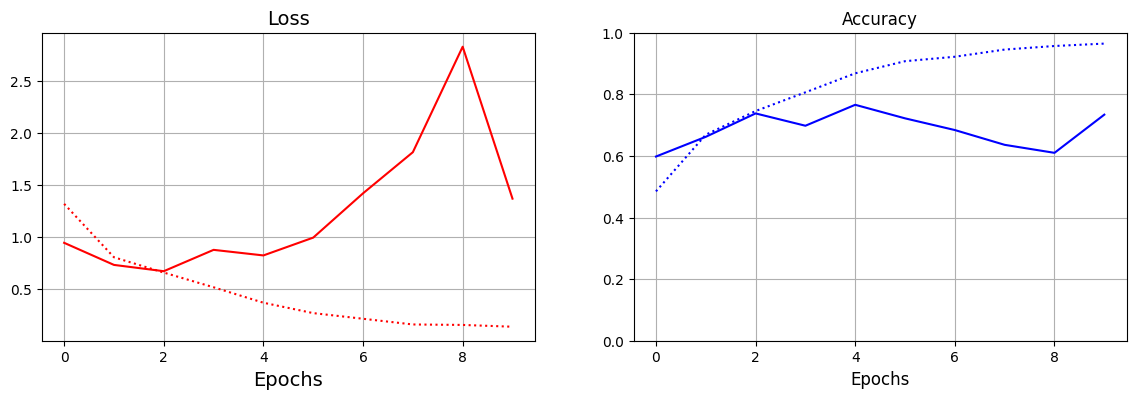

In [8]:
# Visualize the results
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],':r')
plt.plot(history.history['val_loss'],'r')
plt.title('Loss',fontsize=14)
plt.xlabel('Epochs',fontsize=14)
plt.grid()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],':b')
plt.plot(history.history['val_accuracy'],'b')
plt.ylim([0, 1])
plt.title('Accuracy',fontsize=12)
plt.xlabel('Epochs',fontsize=12)
plt.grid()

### Instructions for how to do Transfer Learning and Fine Tuning

- Load a pre trained network (like VGG-16 with Imagenet weights), use the line: *vgg16 = tf.keras.applications.VGG16(input_shape=(150,150,3), include_top=False,weights='imagenet')*, call it vgg16.

- After loading use the line: *vgg16.trainable = False*

- Add the VGG-16 to the model without its head (like we saw on class, in lecture6.ipynb).

- Add your custom head (like we saw on class)

- Freeze the first layer weights using the line: *model.layers[0].trainable = False*

- Train the model on our dataset with RMSProp optimizer (no need to provide learning rate) I recommend using 30 epochs, use this line to compile: *model.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['accuracy'])*

- For Fine Tuning unfreeze the first layer by using the line: *model.layers[0].trainable = True*

- Compile again the model with slow learning rate, use the following lines: *opt = keras.optimizers.SGD(learning_rate=0.0001, momentum=0.9, nesterov=True);
model.compile(optimizer=opt,loss='sparse_categorical_crossentropy',metrics=['accuracy'])*

- Train the model again, I recommend 30 epochs, you should see some improvment in terms of accuracy.

##Loading VGG-16 Model & Transfer Learning

- We load the vgg-16 model without the top layer and start with transfer learning.
- We make all layers not trainable.
- We add our top layer.
- Freeze the first layer wieghts.
- And then we train the top layer of the model.


In [9]:
# Loading pre trained vgg16 network
vgg16 = tf.keras.applications.VGG16(input_shape=(150,150,3), include_top=False,weights='imagenet')

In [10]:
# Make all layers not trainable
vgg16.trainable = False

The custom head with 2 layers additional to vgg mode and dropout of 50%.

In [11]:
# Add a custom head
model_vgg = Sequential()
model_vgg.add(vgg16)

model_vgg.add(Flatten())
model_vgg.add(Dense(1024, activation='relu'))
model_vgg.add(Dropout(0.5))
model_vgg.add(Dense(8, activation='softmax'))


model_vgg.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 1024)              8389632   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_3 (Dense)             (None, 8)                 8200      
                                                                 
Total params: 23,112,520
Trainable params: 8,397,832
Non-trainable params: 14,714,688
_________________________________________________________________


In [12]:
# Freeze the first layer
model_vgg.layers[0].trainable = False

In [13]:
# Compile the model
from tensorflow.keras import optimizers
model_vgg.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

First we train the model - only the head we added, without the vgg, we freeze the weights.

In [14]:
# Train the model (with validation):
history_vgg = model_vgg.fit(X_train, y_train, epochs=30,batch_size=50,
                    validation_data=(X_test, y_test))

Epoch 1/30
90/90 [==============================] - 18s 140ms/step - loss: 1.4890 - accuracy: 0.6511 - val_loss: 0.7741 - val_accuracy: 0.7200
Epoch 2/30
90/90 [==============================] - 12s 134ms/step - loss: 0.5966 - accuracy: 0.8013 - val_loss: 0.6389 - val_accuracy: 0.7740
Epoch 3/30
90/90 [==============================] - 12s 136ms/step - loss: 0.4656 - accuracy: 0.8356 - val_loss: 0.5294 - val_accuracy: 0.8140
Epoch 4/30
90/90 [==============================] - 12s 135ms/step - loss: 0.4049 - accuracy: 0.8567 - val_loss: 0.4958 - val_accuracy: 0.8300
Epoch 5/30
90/90 [==============================] - 12s 135ms/step - loss: 0.3725 - accuracy: 0.8742 - val_loss: 0.4973 - val_accuracy: 0.8420
Epoch 6/30
90/90 [==============================] - 12s 135ms/step - loss: 0.3266 - accuracy: 0.8840 - val_loss: 0.4639 - val_accuracy: 0.8380
Epoch 7/30
90/90 [==============================] - 12s 135ms/step - loss: 0.2929 - accuracy: 0.8962 - val_loss: 0.4913 - val_accuracy: 0.8520

In [15]:
test_loss, test_accuracy = model_vgg.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


16/16 [==============================] - 5s 182ms/step - loss: 0.7354 - accuracy: 0.8680
Test Loss: 0.7353890538215637
Test Accuracy: 0.8679999709129333


In [16]:
train_loss, train_accuracy = model_vgg.evaluate(X_train, y_train)
print(f"Train Loss: {train_loss}")
print(f"Train Accuracy: {train_accuracy}")

141/141 [==============================] - 10s 69ms/step - loss: 0.0323 - accuracy: 0.9920
Train Loss: 0.03234808146953583
Train Accuracy: 0.9919999837875366


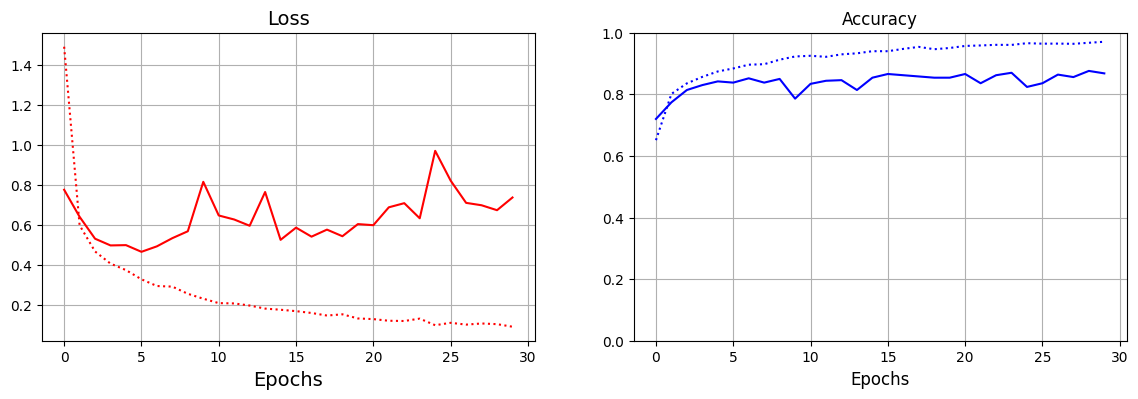

In [17]:
# visualize the results
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
plt.plot(history_vgg.history['loss'],':r')
plt.plot(history_vgg.history['val_loss'],'r')
plt.title('Loss',fontsize=14)
plt.xlabel('Epochs',fontsize=14)
plt.grid()

plt.subplot(1,2,2)
plt.plot(history_vgg.history['accuracy'],':b')
plt.plot(history_vgg.history['val_accuracy'],'b')
plt.ylim([0, 1])
plt.title('Accuracy',fontsize=12)
plt.xlabel('Epochs',fontsize=12)
plt.grid()

##Fine Tunning

In [18]:
# Fine tunning
model_vgg.layers[0].trainable = True

In [19]:
opt = keras.optimizers.SGD(learning_rate=0.0001, momentum=0.9, nesterov=True)
model_vgg.compile(optimizer=opt,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

Now we do fine tunning - training all layers

In [20]:
# Train the model (with validation):
history_ft = model_vgg.fit(X_train, y_train, epochs=30,batch_size=50,
                    validation_data=(X_test, y_test))

Epoch 1/30
90/90 [==============================] - 43s 378ms/step - loss: 0.1749 - accuracy: 0.9447 - val_loss: 0.5343 - val_accuracy: 0.8920
Epoch 2/30
90/90 [==============================] - 33s 369ms/step - loss: 0.0915 - accuracy: 0.9678 - val_loss: 0.7004 - val_accuracy: 0.8560
Epoch 3/30
90/90 [==============================] - 33s 368ms/step - loss: 0.0508 - accuracy: 0.9827 - val_loss: 0.5741 - val_accuracy: 0.8880
Epoch 4/30
90/90 [==============================] - 33s 371ms/step - loss: 0.0645 - accuracy: 0.9811 - val_loss: 0.5420 - val_accuracy: 0.8820
Epoch 5/30
90/90 [==============================] - 33s 370ms/step - loss: 0.0354 - accuracy: 0.9893 - val_loss: 0.5218 - val_accuracy: 0.8860
Epoch 6/30
90/90 [==============================] - 33s 370ms/step - loss: 0.0327 - accuracy: 0.9898 - val_loss: 0.5818 - val_accuracy: 0.8880
Epoch 7/30
90/90 [==============================] - 33s 370ms/step - loss: 0.0331 - accuracy: 0.9898 - val_loss: 0.5700 - val_accuracy: 0.8880

In [21]:
test_loss, test_accuracy = model_vgg.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
Model_model_vgg_accuracy = test_accuracy

16/16 [==============================] - 1s 68ms/step - loss: 0.6223 - accuracy: 0.8900
Test Loss: 0.6222891211509705
Test Accuracy: 0.8899999856948853


In [22]:
train_loss, train_accuracy = model_vgg.evaluate(X_train, y_train)
print(f"Train Loss: {train_loss}")
print(f"Train Accuracy: {train_accuracy}")

141/141 [==============================] - 10s 69ms/step - loss: 0.0038 - accuracy: 0.9991
Train Loss: 0.003816553857177496
Train Accuracy: 0.9991111159324646


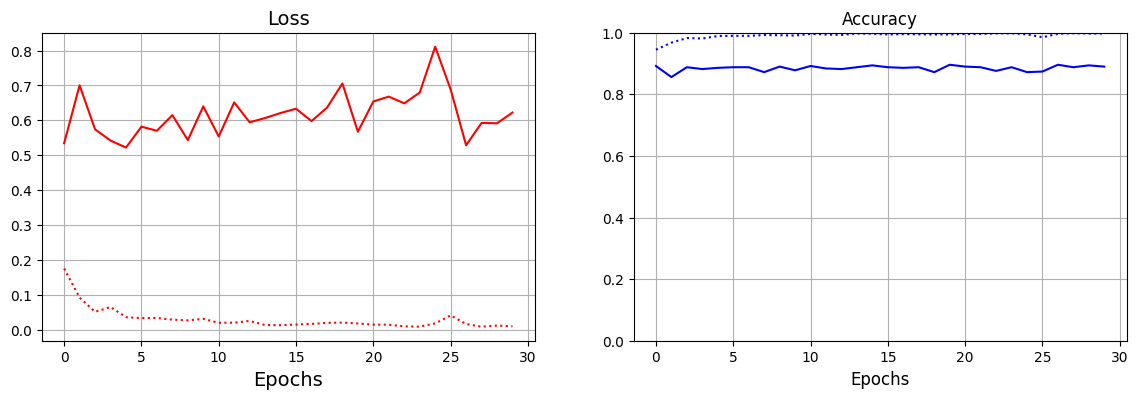

In [23]:
# visualize the results
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
plt.plot(history_ft.history['loss'],':r',label = 'Training loss')
plt.plot(history_ft.history['val_loss'],'r', label = 'Validation loss')
plt.title('Loss',fontsize=14)
plt.xlabel('Epochs',fontsize=14)
plt.grid()

plt.subplot(1,2,2)
plt.plot(history_ft.history['accuracy'],':b',label = 'Training Accuracy')
plt.plot(history_ft.history['val_accuracy'],'b',label = 'Training Accuracy')
plt.ylim([0, 1])
plt.title('Accuracy',fontsize=12)
plt.xlabel('Epochs',fontsize=12)
plt.grid()

#Our Results
**VGG**

Train Accuracy: 0.9997777938842773

Test Accuracy: 0.9179999828338623

**CNN**

Train Accuracy: 0.9860000014305115

Test Accuracy: 0.7179999947547913

##Data Augmentation

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an instance of the ImageDataGenerator with desired augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.01,
    height_shift_range=0.01,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True
)

# Fit the ImageDataGenerator on the training data
datagen.fit(X_train)
#This step ensures that the generated augmented data will be consistent with the original data and aligned with the characteristics of the training dataset.

# Create an iterator for generating augmented images
augmented_iterator = datagen.flow(X_train, y_train, batch_size=32)
#Training the model for a larger number of epochs will result in more iterations through the dataset, leading to a higher total number of augmented samples.




x_batch.shape =  (32, 150, 150, 3)
y_batch.shape =  (32,)


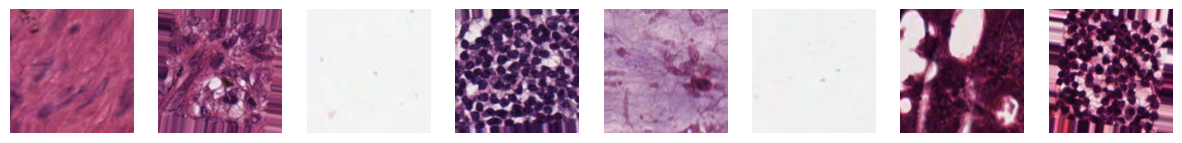

In [25]:
#Checking the augmented data we created
x_batch, y_batch = augmented_iterator.next()

plt.figure(figsize=(15,5))
for i in range(8):
    plt.subplot(1,8,i+1)
    plt.imshow(x_batch[i])
    plt.axis('off')

print('x_batch.shape = ',x_batch.shape)
print('y_batch.shape = ',y_batch.shape)

VGG

In [26]:
#our model for data augmaention - vgg model with transfer learning
model_data_aug = model_vgg

In [27]:
# Train the model using augmented_iterator with the current batch size
history = model_data_aug.fit(augmented_iterator, epochs=30, validation_data=(X_test, y_test))

Epoch 1/30
141/141 [==============================] - 40s 250ms/step - loss: 0.3680 - accuracy: 0.8907 - val_loss: 0.4068 - val_accuracy: 0.8800
Epoch 2/30
141/141 [==============================] - 31s 219ms/step - loss: 0.2591 - accuracy: 0.9127 - val_loss: 0.3850 - val_accuracy: 0.8920
Epoch 3/30
141/141 [==============================] - 32s 223ms/step - loss: 0.2463 - accuracy: 0.9216 - val_loss: 0.2715 - val_accuracy: 0.9180
Epoch 4/30
141/141 [==============================] - 31s 222ms/step - loss: 0.2294 - accuracy: 0.9247 - val_loss: 0.3140 - val_accuracy: 0.9040
Epoch 5/30
141/141 [==============================] - 31s 221ms/step - loss: 0.2037 - accuracy: 0.9331 - val_loss: 0.3517 - val_accuracy: 0.8940
Epoch 6/30
141/141 [==============================] - 32s 223ms/step - loss: 0.1919 - accuracy: 0.9340 - val_loss: 0.2795 - val_accuracy: 0.9120
Epoch 7/30
141/141 [==============================] - 31s 221ms/step - loss: 0.1721 - accuracy: 0.9420 - val_loss: 0.2828 - val_ac

In [28]:
test_loss, test_accuracy = model_data_aug.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
Model_model_data_aug_vgg_accuracy = test_accuracy

16/16 [==============================] - 1s 70ms/step - loss: 0.3100 - accuracy: 0.9260
Test Loss: 0.3100430965423584
Test Accuracy: 0.9259999990463257


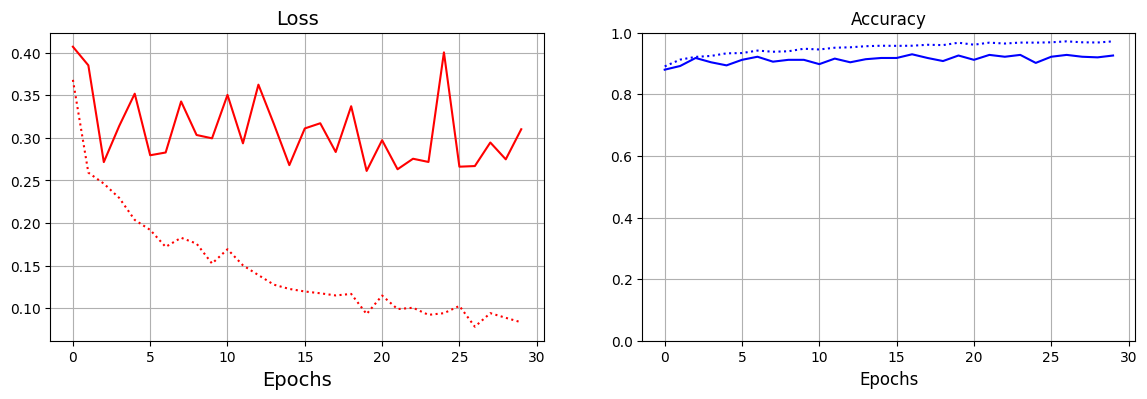

In [29]:
# Visualize the results
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],':r')
plt.plot(history.history['val_loss'],'r')
plt.title('Loss',fontsize=14)
plt.xlabel('Epochs',fontsize=14)
plt.grid()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],':b')
plt.plot(history.history['val_accuracy'],'b')
plt.ylim([0, 1])
plt.title('Accuracy',fontsize=12)
plt.xlabel('Epochs',fontsize=12)
plt.grid()

CNN

In [30]:
#trying onother model for data augmaention - cnn model
model_data_aug_cnn = model_cnn

In [31]:
# Train the model using augmented_iterator with the current batch size
history = model_data_aug.fit(augmented_iterator, epochs=30, validation_data=(X_test, y_test))

Epoch 1/30
141/141 [==============================] - 32s 224ms/step - loss: 0.0786 - accuracy: 0.9753 - val_loss: 0.2969 - val_accuracy: 0.9180
Epoch 2/30
141/141 [==============================] - 31s 222ms/step - loss: 0.0915 - accuracy: 0.9718 - val_loss: 0.3344 - val_accuracy: 0.9180
Epoch 3/30
141/141 [==============================] - 32s 223ms/step - loss: 0.0783 - accuracy: 0.9753 - val_loss: 0.3436 - val_accuracy: 0.9240
Epoch 4/30
141/141 [==============================] - 31s 222ms/step - loss: 0.0765 - accuracy: 0.9740 - val_loss: 0.2982 - val_accuracy: 0.9320
Epoch 5/30
141/141 [==============================] - 31s 222ms/step - loss: 0.0736 - accuracy: 0.9742 - val_loss: 0.2968 - val_accuracy: 0.9220
Epoch 6/30
141/141 [==============================] - 31s 222ms/step - loss: 0.0800 - accuracy: 0.9727 - val_loss: 0.4082 - val_accuracy: 0.9100
Epoch 7/30
141/141 [==============================] - 31s 222ms/step - loss: 0.0816 - accuracy: 0.9733 - val_loss: 0.2482 - val_ac

In [32]:
test_loss, test_accuracy = model_data_aug_cnn.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
Model_model_data_aug_cnn_acuracy = test_accuracy

16/16 [==============================] - 0s 7ms/step - loss: 1.3685 - accuracy: 0.7340
Test Loss: 1.3684755563735962
Test Accuracy: 0.734000027179718


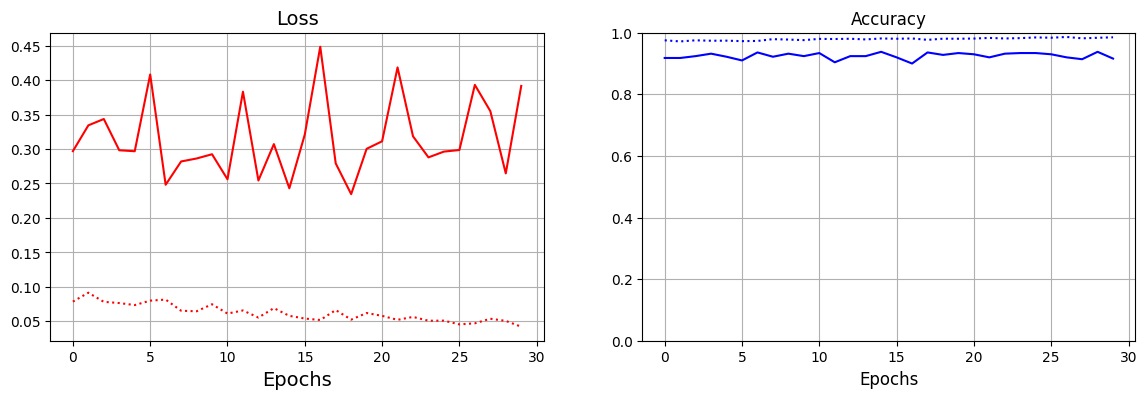

In [33]:
# Visualize the results
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],':r')
plt.plot(history.history['val_loss'],'r')
plt.title('Loss',fontsize=14)
plt.xlabel('Epochs',fontsize=14)
plt.grid()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],':b')
plt.plot(history.history['val_accuracy'],'b')
plt.ylim([0, 1])
plt.title('Accuracy',fontsize=12)
plt.xlabel('Epochs',fontsize=12)
plt.grid()

##Different Architecture

**CNN**

Train Accuracy: 0.9860000014305115

Test Accuracy: 0.7179999947547913

---
CNN with tha same number of layers - we increase the number of neurons, ans delete one maxpooling.

In [34]:
########## CNN with different architecture ##########
model_cnn_da = Sequential()
model_cnn_da.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model_cnn_da.add(MaxPooling2D((2, 2)))
model_cnn_da.add(Conv2D(64, (3, 3), activation='relu'))
#delete one max pooling
model_cnn_da.add(Flatten())
model_cnn_da.add(Dense(128, activation='relu')) #changing the number of neurons from 64 -> 128
model_cnn_da.add(Dense(8, activation='softmax'))


In [35]:
# Compile the model
from tensorflow.keras import optimizers
model_cnn_da.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [36]:
# Train the model (with validation):
history = model_cnn_da.fit(X_train, y_train, epochs=10,batch_size=15,validation_data=(X_test, y_test))

Epoch 1/10
300/300 [==============================] - 6s 17ms/step - loss: 1.6751 - accuracy: 0.4296 - val_loss: 0.9648 - val_accuracy: 0.6060
Epoch 2/10
300/300 [==============================] - 5s 16ms/step - loss: 0.8912 - accuracy: 0.6198 - val_loss: 1.1450 - val_accuracy: 0.5980
Epoch 3/10
300/300 [==============================] - 5s 15ms/step - loss: 0.6875 - accuracy: 0.7124 - val_loss: 0.8252 - val_accuracy: 0.6380
Epoch 4/10
300/300 [==============================] - 5s 16ms/step - loss: 0.4618 - accuracy: 0.8140 - val_loss: 0.9437 - val_accuracy: 0.6940
Epoch 5/10
300/300 [==============================] - 5s 16ms/step - loss: 0.3525 - accuracy: 0.8804 - val_loss: 1.8468 - val_accuracy: 0.5940
Epoch 6/10
300/300 [==============================] - 5s 16ms/step - loss: 0.3139 - accuracy: 0.9036 - val_loss: 2.0670 - val_accuracy: 0.6080
Epoch 7/10
300/300 [==============================] - 5s 15ms/step - loss: 0.2211 - accuracy: 0.9300 - val_loss: 1.6846 - val_accuracy: 0.6520

In [37]:
test_loss, test_accuracy = model_cnn_da.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
Model_model_cnn_da_accuracy = test_accuracy

16/16 [==============================] - 0s 10ms/step - loss: 2.0801 - accuracy: 0.6180
Test Loss: 2.080124616622925
Test Accuracy: 0.6179999709129333


In [38]:
train_loss, train_accuracy = model_cnn_da.evaluate(X_train, y_train)
print(f"Train Loss: {train_loss}")
print(f"Train Accuracy: {train_accuracy}")

141/141 [==============================] - 1s 9ms/step - loss: 0.0631 - accuracy: 0.9769
Train Loss: 0.06306175142526627
Train Accuracy: 0.97688889503479


**Test**

0.6859999895095825

**Train**

0.9866666793823242

After delete one maxpool and changing number of neurons it seems that there is higher overfitting. It is make sense because max pooling should decrease over fitting. The model is less good than the previous one.

---
CNN with tha same number of layers - we add dropuot of 50%.

In [39]:
########## CNN with different architecture ##########
# cnn with dropout - cnn_wd
model_cnn_wd = Sequential()
model_cnn_wd.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model_cnn_wd.add(MaxPooling2D((2, 2)))
model_cnn_wd.add(Conv2D(64, (3, 3), activation='relu'))
model_cnn_wd.add(MaxPooling2D((2, 2)))
model_cnn_wd.add(Flatten())
model_cnn_wd.add(Dense(64, activation='relu'))
# Add dropout regularization
model_cnn_wd.add(Dropout(0.5))
model_cnn_wd.add(Dense(8, activation='softmax'))

In [40]:
# Compile the model
from tensorflow.keras import optimizers
model_cnn_wd.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [41]:
# Train the model (with validation):
history = model_cnn_wd.fit(X_train, y_train, epochs=10,batch_size=15,validation_data=(X_test, y_test))

Epoch 1/10
300/300 [==============================] - 5s 13ms/step - loss: 1.6188 - accuracy: 0.3569 - val_loss: 1.0370 - val_accuracy: 0.5980
Epoch 2/10
300/300 [==============================] - 3s 10ms/step - loss: 1.1626 - accuracy: 0.4989 - val_loss: 0.8947 - val_accuracy: 0.6060
Epoch 3/10
300/300 [==============================] - 3s 10ms/step - loss: 1.0067 - accuracy: 0.5658 - val_loss: 0.9923 - val_accuracy: 0.5580
Epoch 4/10
300/300 [==============================] - 3s 10ms/step - loss: 0.9028 - accuracy: 0.6133 - val_loss: 0.7797 - val_accuracy: 0.6680
Epoch 5/10
300/300 [==============================] - 3s 10ms/step - loss: 0.8252 - accuracy: 0.6611 - val_loss: 1.0250 - val_accuracy: 0.5920
Epoch 6/10
300/300 [==============================] - 3s 10ms/step - loss: 0.7613 - accuracy: 0.6856 - val_loss: 0.7393 - val_accuracy: 0.7400
Epoch 7/10
300/300 [==============================] - 3s 10ms/step - loss: 0.6970 - accuracy: 0.7120 - val_loss: 0.7483 - val_accuracy: 0.6840

In [42]:
test_loss, test_accuracy = model_cnn_wd.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
Model_model_cnn_wd_accuracy = test_accuracy

16/16 [==============================] - 0s 7ms/step - loss: 0.9149 - accuracy: 0.7240
Test Loss: 0.9148946404457092
Test Accuracy: 0.7239999771118164


In [43]:
train_loss, train_accuracy = model_cnn_wd.evaluate(X_train, y_train)
print(f"Train Loss: {train_loss}")
print(f"Train Accuracy: {train_accuracy}")

141/141 [==============================] - 1s 8ms/step - loss: 0.2091 - accuracy: 0.9520
Train Loss: 0.2090824991464615
Train Accuracy: 0.9520000219345093


**Test**

0.7099999785423279

**Train**

0.8144444227218628

After adding dropout of 50% we can see that there is less over fitting as we acpected - dropout should decrease overfitting.

---
**VGG**

Train Accuracy: 0.9997777938842773

Test Accuracy: 0.9179999828338623

---
Here we add another dropout of 10% and we increase the number of nerons.

In [44]:
########## VGG with different architecture ##########
#vgg with 10 dropout = vgg_10d
# Loading pre trained vgg16 network
vgg16 = tf.keras.applications.VGG16(input_shape=(150,150,3), include_top=False,weights='imagenet')

# Make all layers not trainable
vgg16.trainable = False

# Add a custom head
model_vgg_10d = Sequential()
model_vgg_10d.add(vgg16)
model_vgg_10d.add(Flatten())
model_vgg_10d.add(Dropout(0.1)) #add another dropuot
model_vgg_10d.add(Dense(2048, activation='relu')) #change the number of neurons from 1024 -> 2048
model_vgg_10d.add(Dropout(0.5))
model_vgg_10d.add(Dense(8, activation='softmax'))

# Freeze the first layer
model_vgg_10d.layers[0].trainable = False

# Compile the model
from tensorflow.keras import optimizers
model_vgg_10d.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# Train the model (with validation):
history_vgg = model_vgg_10d.fit(X_train, y_train, epochs=30,batch_size=50,
                    validation_data=(X_test, y_test))

# Fine tunning
model_vgg_10d.layers[0].trainable = True

# Compile the model
opt = keras.optimizers.SGD(learning_rate=0.0001, momentum=0.9, nesterov=True)
model_vgg_10d.compile(optimizer=opt,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# Train the model (with validation):
history_ft = model_vgg_10d.fit(X_train, y_train, epochs=30,batch_size=50,
                    validation_data=(X_test, y_test))

Epoch 1/30
90/90 [==============================] - 13s 139ms/step - loss: 1.9674 - accuracy: 0.6309 - val_loss: 0.9006 - val_accuracy: 0.6720
Epoch 2/30
90/90 [==============================] - 12s 135ms/step - loss: 0.6580 - accuracy: 0.7782 - val_loss: 0.7537 - val_accuracy: 0.7460
Epoch 3/30
90/90 [==============================] - 12s 135ms/step - loss: 0.5278 - accuracy: 0.8193 - val_loss: 0.7276 - val_accuracy: 0.7720
Epoch 4/30
90/90 [==============================] - 12s 135ms/step - loss: 0.4556 - accuracy: 0.8449 - val_loss: 0.6155 - val_accuracy: 0.8020
Epoch 5/30
90/90 [==============================] - 12s 135ms/step - loss: 0.4105 - accuracy: 0.8578 - val_loss: 0.6094 - val_accuracy: 0.8000
Epoch 6/30
90/90 [==============================] - 12s 135ms/step - loss: 0.3668 - accuracy: 0.8751 - val_loss: 0.5035 - val_accuracy: 0.8380
Epoch 7/30
90/90 [==============================] - 12s 135ms/step - loss: 0.3504 - accuracy: 0.8791 - val_loss: 0.5360 - val_accuracy: 0.8540

In [45]:
test_loss, test_accuracy = model_vgg_10d.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
Model_model_vgg_10d_accuracy = test_accuracy

16/16 [==============================] - 1s 70ms/step - loss: 0.6145 - accuracy: 0.8980
Test Loss: 0.6144933700561523
Test Accuracy: 0.8980000019073486


In [46]:
train_loss, train_accuracy = model_vgg_10d.evaluate(X_train, y_train)
print(f"Train Loss: {train_loss}")
print(f"Train Accuracy: {train_accuracy}")

141/141 [==============================] - 10s 70ms/step - loss: 0.0070 - accuracy: 0.9989
Train Loss: 0.00701136002317071
Train Accuracy: 0.9988889098167419


**Test**

0.9139999747276306

**Train**

0.9973333477973938

After adding more 0.1 dropout and changing the number of neurons there is no change - we think because it is a deep network with a big number of layers, maybe this are minor changes.

##Different Optimizer

**CNN**

In [47]:
########## CNN with different optimizer ##########
dif_opt_cnn = model_cnn

#Compile the model with the new optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate= 0.0001, momentum=0.9)
dif_opt_cnn .compile(optimizer= optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])


 SGD is a classic optimizer. It updates the model parameters based on the gradient of the loss function with respect to the parameters. SGD can be effective in training CNNs, especially when combined with learning rate schedules or momentum.

In [48]:
# Train the model (with validation):
history= dif_opt_cnn.fit(X_train, y_train, epochs=10,batch_size=15,validation_data=(X_test, y_test))

Epoch 1/10
300/300 [==============================] - 4s 11ms/step - loss: 0.0262 - accuracy: 0.9938 - val_loss: 1.4898 - val_accuracy: 0.7500
Epoch 2/10
300/300 [==============================] - 3s 10ms/step - loss: 0.0270 - accuracy: 0.9931 - val_loss: 1.5218 - val_accuracy: 0.7240
Epoch 3/10
300/300 [==============================] - 3s 10ms/step - loss: 0.0214 - accuracy: 0.9944 - val_loss: 1.5374 - val_accuracy: 0.7280
Epoch 4/10
300/300 [==============================] - 3s 10ms/step - loss: 0.0489 - accuracy: 0.9844 - val_loss: 1.5992 - val_accuracy: 0.7320
Epoch 5/10
300/300 [==============================] - 3s 10ms/step - loss: 0.0222 - accuracy: 0.9944 - val_loss: 1.6035 - val_accuracy: 0.7320
Epoch 6/10
300/300 [==============================] - 3s 10ms/step - loss: 0.0228 - accuracy: 0.9940 - val_loss: 1.5822 - val_accuracy: 0.7360
Epoch 7/10
300/300 [==============================] - 3s 10ms/step - loss: 0.0209 - accuracy: 0.9953 - val_loss: 1.6496 - val_accuracy: 0.7320

In [49]:
#Check the accuray of the model
test_loss, test_accuracy = dif_opt_cnn.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
Model_dif_opt_cnn_accuracy = test_accuracy

16/16 [==============================] - 0s 7ms/step - loss: 1.6859 - accuracy: 0.7280
Test Loss: 1.6859017610549927
Test Accuracy: 0.7279999852180481


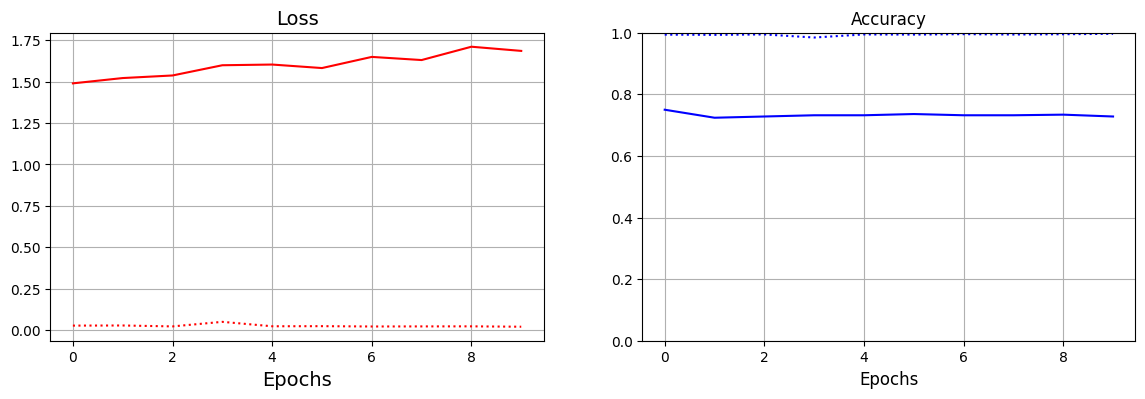

In [50]:
# Visualize the results
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],':r')
plt.plot(history.history['val_loss'],'r')
plt.title('Loss',fontsize=14)
plt.xlabel('Epochs',fontsize=14)
plt.grid()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],':b')
plt.plot(history.history['val_accuracy'],'b')
plt.ylim([0, 1])
plt.title('Accuracy',fontsize=12)
plt.xlabel('Epochs',fontsize=12)
plt.grid()

**CNN with rmsprop optimizer**

Test Loss: 1.2857860326766968

Test Accuracy: 0.7360000014305115

**CNN with SGD optimizer**

Test Loss: 1.4207499027252197

Test Accuracy: 0.7699999809265137


*The accuracy was better when we used SGD optimizer in CNN model.*


**VGG**

In [51]:
########## VGG with different optimizer ##########
dif_opt_model = model_vgg #we used the vgg model with fine tuning and transfer leraning we build before

#Compile the model with the new optimizer

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
dif_opt_model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


The Adam optimizer combines the benefits of two other popular optimizers: AdaGrad and RMSProp. It adapts the learning rate dynamically for each parameter, allowing faster convergence and better performance on a wide range of problems. The Adam optimizer is well-suited for fine-tuning because it can handle different learning rates for different layers, which is often desired when fine-tuning pre-trained models.

In [52]:
# Train the model (with validation):
history = dif_opt_model.fit(X_train, y_train, epochs=30,batch_size=50,
                    validation_data=(X_test, y_test))

Epoch 1/30
90/90 [==============================] - 39s 374ms/step - loss: 0.6146 - accuracy: 0.8316 - val_loss: 0.3860 - val_accuracy: 0.8800
Epoch 2/30
90/90 [==============================] - 33s 369ms/step - loss: 0.3068 - accuracy: 0.8967 - val_loss: 0.4501 - val_accuracy: 0.8460
Epoch 3/30
90/90 [==============================] - 33s 367ms/step - loss: 0.1860 - accuracy: 0.9351 - val_loss: 0.4509 - val_accuracy: 0.8700
Epoch 4/30
90/90 [==============================] - 33s 368ms/step - loss: 0.1811 - accuracy: 0.9409 - val_loss: 0.3425 - val_accuracy: 0.8980
Epoch 5/30
90/90 [==============================] - 33s 368ms/step - loss: 0.1895 - accuracy: 0.9376 - val_loss: 0.3199 - val_accuracy: 0.8960
Epoch 6/30
90/90 [==============================] - 33s 366ms/step - loss: 0.1112 - accuracy: 0.9596 - val_loss: 0.4433 - val_accuracy: 0.9060
Epoch 7/30
90/90 [==============================] - 33s 366ms/step - loss: 0.2106 - accuracy: 0.9318 - val_loss: 0.3338 - val_accuracy: 0.8900

In [53]:
#Check the accuray of the model
test_loss, test_accuracy = dif_opt_model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
Model_dif_opt_model_accuracy = test_accuracy

16/16 [==============================] - 1s 69ms/step - loss: 0.4713 - accuracy: 0.8980
Test Loss: 0.4712769091129303
Test Accuracy: 0.8980000019073486


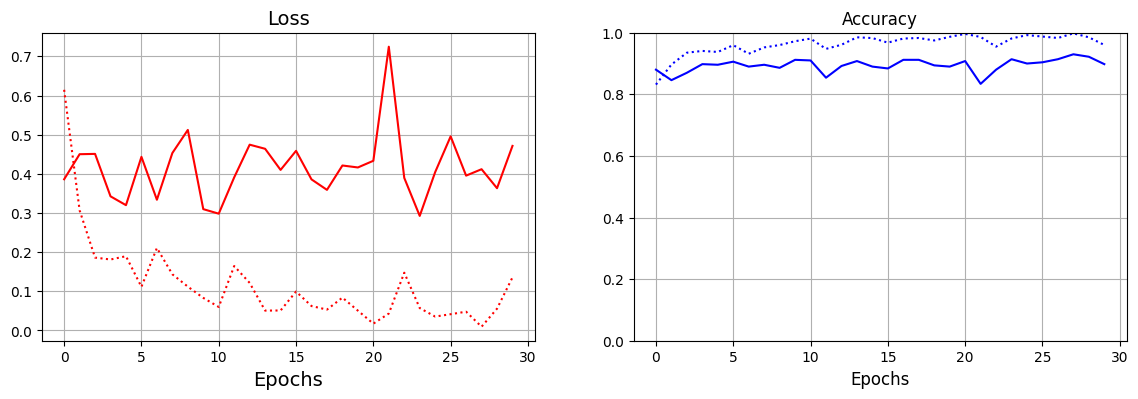

In [54]:
# Visualize the results
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],':r')
plt.plot(history.history['val_loss'],'r')
plt.title('Loss',fontsize=14)
plt.xlabel('Epochs',fontsize=14)
plt.grid()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],':b')
plt.plot(history.history['val_accuracy'],'b')
plt.ylim([0, 1])
plt.title('Accuracy',fontsize=12)
plt.xlabel('Epochs',fontsize=12)
plt.grid()

**VGG with SGD optimizer**

Test Loss: 0.521325945854187

Test Accuracy: 0.9139999747276306

**VGG with Adam optimizer**

Test Loss: 2.0799152851104736

Test Accuracy: 0.1120000034570694

VGG model has better outcomes when using SGD optimizer

**FROM CHAT GPT**

In the given code, the optimizer specified is 'rmsprop'. However, there are several other optimizers available in Keras that you can use instead. Here are a few commonly used optimizers in Keras:

1. **RMSprop**: Root Mean Square Propagation optimizer. It uses the magnitude of recent gradients to normalize the weight updates. Example: `optimizer='rmsprop'`.

2. **Adam**: Adaptive Moment Estimation optimizer. It combines the advantages of RMSprop and Momentum optimization. It adapts the learning rate based on the first and second moments of the gradients. Example: `optimizer='adam'`.

3. **SGD**: Stochastic Gradient Descent optimizer. It updates the weights in the direction of the negative gradient of the loss function. Example: `optimizer='sgd'`.

4. **Adagrad**: Adaptive Gradient optimizer. It adapts the learning rate for each parameter based on the historical gradient values. Example: `optimizer='adagrad'`.

5. **Adadelta**: Adaptive Delta optimizer. It adapts the learning rate based on the gradient updates over previous iterations. Example: `optimizer='adadelta'`.

6. **Adamax**: Variant of Adam optimizer that uses the infinity norm for weight updates. Example: `optimizer='adamax'`.

7. **Nadam**: Nesterov Adam optimizer. It is a variant of Adam optimizer that incorporates the Nesterov momentum. Example: `optimizer='nadam'`.

These are just a few examples of optimizers available in Keras. Each optimizer has its own advantages and may perform differently depending on the specific task and dataset.

##Different Number of Layers

**CNN**

Train Accuracy: 0.9860000014305115

Test Accuracy: 0.7179999947547913

---
Here we have CNN with 5 layers and we increase the number of neurons.

In [55]:
########## CNN with different number of layers ##########
#different number of layers model = cnn_dnl
# Creating the model
model_cnn_dnl = Sequential()
model_cnn_dnl.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model_cnn_dnl.add(MaxPooling2D((2, 2)))
model_cnn_dnl.add(Conv2D(64, (3, 3), activation='relu'))
model_cnn_dnl.add(MaxPooling2D((2, 2)))
model_cnn_dnl.add(Conv2D(128, (3, 3), activation='relu')) #add another layer
model_cnn_dnl.add(Flatten())
model_cnn_dnl.add(Dense(256, activation='relu')) #change number of neurons
model_cnn_dnl.add(Dense(8, activation='softmax'))

# Compile the model
from tensorflow.keras import optimizers
model_cnn_dnl.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# Train the model (with validation):
history = model_cnn_dnl.fit(X_train, y_train, epochs=10,batch_size=15,validation_data=(X_test, y_test))

Epoch 1/10
300/300 [==============================] - 7s 18ms/step - loss: 1.6392 - accuracy: 0.4271 - val_loss: 0.9796 - val_accuracy: 0.5520
Epoch 2/10
300/300 [==============================] - 5s 17ms/step - loss: 0.9098 - accuracy: 0.6113 - val_loss: 0.7349 - val_accuracy: 0.6460
Epoch 3/10
300/300 [==============================] - 5s 17ms/step - loss: 0.7566 - accuracy: 0.6909 - val_loss: 0.6805 - val_accuracy: 0.7140
Epoch 4/10
300/300 [==============================] - 5s 17ms/step - loss: 0.5948 - accuracy: 0.7802 - val_loss: 0.7626 - val_accuracy: 0.7620
Epoch 5/10
300/300 [==============================] - 5s 17ms/step - loss: 0.4067 - accuracy: 0.8524 - val_loss: 0.7677 - val_accuracy: 0.7380
Epoch 6/10
300/300 [==============================] - 5s 17ms/step - loss: 0.3034 - accuracy: 0.9058 - val_loss: 0.8516 - val_accuracy: 0.7780
Epoch 7/10
300/300 [==============================] - 5s 17ms/step - loss: 0.2267 - accuracy: 0.9316 - val_loss: 1.4405 - val_accuracy: 0.7400

In [56]:
test_loss, test_accuracy = model_cnn_dnl.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
Model_model_cnn_dnl_accuracy = test_accuracy

16/16 [==============================] - 0s 12ms/step - loss: 2.0031 - accuracy: 0.7220
Test Loss: 2.0030713081359863
Test Accuracy: 0.722000002861023


In [57]:
train_loss, train_accuracy = model_cnn_dnl.evaluate(X_train, y_train)
print(f"Train Loss: {train_loss}")
print(f"Train Accuracy: {train_accuracy}")

141/141 [==============================] - 1s 9ms/step - loss: 0.0537 - accuracy: 0.9836
Train Loss: 0.05367302522063255
Train Accuracy: 0.9835555553436279


**Test**

0.7139999866485596

**Train**

0.9864444732666016

After adding one more layer and changing the number of neurons there is no change

---
Here we delete one layer - total 3 layers

In [58]:
########## CNN with different number of layers ##########
#delete 1 layer - cnn_d1
# Creating the model
model_cnn_d1 = Sequential()
model_cnn_d1.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model_cnn_d1.add(MaxPooling2D((2, 2)))
model_cnn_d1.add(Conv2D(64, (3, 3), activation='relu'))
model_cnn_d1.add(MaxPooling2D((2, 2)))
model_cnn_d1.add(Flatten())
#delete one layer
model_cnn_d1.add(Dense(8, activation='softmax'))

# Compile the model
from tensorflow.keras import optimizers
model_cnn_d1.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# Train the model (with validation):
history = model_cnn_d1.fit(X_train, y_train, epochs=10,batch_size=15,validation_data=(X_test, y_test))

Epoch 1/10
300/300 [==============================] - 4s 10ms/step - loss: 1.2970 - accuracy: 0.4736 - val_loss: 1.0076 - val_accuracy: 0.5920
Epoch 2/10
300/300 [==============================] - 3s 9ms/step - loss: 0.8083 - accuracy: 0.6780 - val_loss: 1.3777 - val_accuracy: 0.5600
Epoch 3/10
300/300 [==============================] - 3s 9ms/step - loss: 0.6673 - accuracy: 0.7502 - val_loss: 0.7813 - val_accuracy: 0.7080
Epoch 4/10
300/300 [==============================] - 3s 9ms/step - loss: 0.5348 - accuracy: 0.8051 - val_loss: 0.9055 - val_accuracy: 0.6920
Epoch 5/10
300/300 [==============================] - 3s 9ms/step - loss: 0.4245 - accuracy: 0.8582 - val_loss: 1.0334 - val_accuracy: 0.6940
Epoch 6/10
300/300 [==============================] - 3s 9ms/step - loss: 0.3261 - accuracy: 0.8964 - val_loss: 1.0714 - val_accuracy: 0.6820
Epoch 7/10
300/300 [==============================] - 3s 9ms/step - loss: 0.3260 - accuracy: 0.9158 - val_loss: 1.3687 - val_accuracy: 0.6680
Epoch

In [59]:
test_loss, test_accuracy = model_cnn_d1.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
model_cnn_dnl_accuracy = test_accuracy

16/16 [==============================] - 0s 7ms/step - loss: 3.2942 - accuracy: 0.5780
Test Loss: 3.2941737174987793
Test Accuracy: 0.578000009059906


In [60]:
train_loss, train_accuracy = model_cnn_d1.evaluate(X_train, y_train)
print(f"Train Loss: {train_loss}")
print(f"Train Accuracy: {train_accuracy}")

141/141 [==============================] - 1s 8ms/step - loss: 0.4879 - accuracy: 0.8704
Train Loss: 0.48787352442741394
Train Accuracy: 0.8704444169998169


**Test**

0.5759999752044678

**Train**

0.8786666393280029

After delete one layer we can see a drastic change - the test accuracy decrease.

---
**VGG**

Train Accuracy: 0.9997777938842773

Test Accuracy: 0.9179999828338623

Here we add 2 more dense layers.

In [61]:
########## VGG with different number of layers ##########
#two more layers - vgg_2la
# Loading pre trained vgg16 network
vgg16 = tf.keras.applications.VGG16(input_shape=(150,150,3), include_top=False,weights='imagenet')

# Make all layers not trainable
vgg16.trainable = False

# Add a custom head
model_vgg_2la = Sequential()
model_vgg_2la.add(vgg16)
model_vgg_2la.add(Flatten())
model_vgg_2la.add(Dense(1024, activation='relu'))
model_vgg_2la.add(Dense(1024, activation='relu')) # add layer
model_vgg_2la.add(Dense(2056, activation='relu')) # add layer
model_vgg_2la.add(Dropout(0.5))
model_vgg_2la.add(Dense(8, activation='softmax'))

# Freeze the first layer
model_vgg_2la.layers[0].trainable = False

# Compile the model
from tensorflow.keras import optimizers
model_vgg_2la.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# Train the model (with validation):
history_vgg = model_vgg_2la.fit(X_train, y_train, epochs=30,batch_size=50,
                    validation_data=(X_test, y_test))

# Fine tunning
model_vgg_2la.layers[0].trainable = True

# Compile the model
opt = keras.optimizers.SGD(learning_rate=0.0001, momentum=0.9, nesterov=True)
model_vgg_2la.compile(optimizer=opt,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# Train the model (with validation):
history_ft = model_vgg_2la.fit(X_train, y_train, epochs=30,batch_size=50,
                    validation_data=(X_test, y_test))

Epoch 1/30
90/90 [==============================] - 14s 140ms/step - loss: 1.4059 - accuracy: 0.5891 - val_loss: 0.6764 - val_accuracy: 0.7640
Epoch 2/30
90/90 [==============================] - 12s 136ms/step - loss: 0.5881 - accuracy: 0.7996 - val_loss: 0.6597 - val_accuracy: 0.7780
Epoch 3/30
90/90 [==============================] - 12s 135ms/step - loss: 0.4439 - accuracy: 0.8511 - val_loss: 0.6123 - val_accuracy: 0.8020
Epoch 4/30
90/90 [==============================] - 12s 135ms/step - loss: 0.3766 - accuracy: 0.8762 - val_loss: 0.4555 - val_accuracy: 0.8500
Epoch 5/30
90/90 [==============================] - 12s 135ms/step - loss: 0.3035 - accuracy: 0.8918 - val_loss: 0.5369 - val_accuracy: 0.8400
Epoch 6/30
90/90 [==============================] - 12s 135ms/step - loss: 0.2598 - accuracy: 0.9136 - val_loss: 0.6305 - val_accuracy: 0.8240
Epoch 7/30
90/90 [==============================] - 12s 135ms/step - loss: 0.2158 - accuracy: 0.9293 - val_loss: 0.8695 - val_accuracy: 0.8020

In [62]:
test_loss, test_accuracy = model_vgg_2la.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
Model_model_vgg_2la_accuracy = test_accuracy

16/16 [==============================] - 1s 68ms/step - loss: 0.3588 - accuracy: 0.9020
Test Loss: 0.35876068472862244
Test Accuracy: 0.9020000100135803


In [63]:
train_loss, train_accuracy = model_vgg_2la.evaluate(X_train, y_train)
print(f"Train Loss: {train_loss}")
print(f"Train Accuracy: {train_accuracy}")

141/141 [==============================] - 10s 69ms/step - loss: 0.0294 - accuracy: 0.9936
Train Loss: 0.029443159699440002
Train Accuracy: 0.9935555458068848


**Test**

0.9440000057220459

**Train**

0.9995555281639099

We add 2 more layers and we can see that it improved the model.

#Conclusion and evaluation#

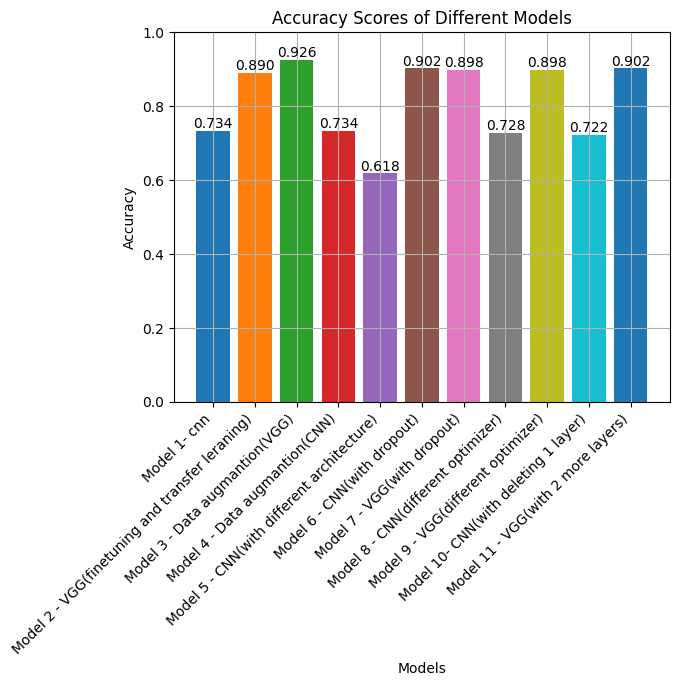

In [69]:
import matplotlib.pyplot as plt

accuracy_scores = [Model_cnn_accuracy,Model_model_vgg_accuracy,Model_model_data_aug_vgg_accuracy,Model_model_data_aug_cnn_acuracy,Model_model_cnn_da_accuracy,Model_model_vgg_2la_accuracy,
                   Model_model_vgg_10d_accuracy,Model_dif_opt_cnn_accuracy,Model_dif_opt_model_accuracy,Model_model_cnn_dnl_accuracy,Model_model_vgg_2la_accuracy]

model_names = ['Model 1- cnn','Model 2 - VGG(finetuning and transfer leraning)','Model 3 - Data augmantion(VGG)',
               'Model 4 - Data augmantion(CNN)','Model 5 - CNN(with different architecture)','Model 6 - CNN(with dropout)', 'Model 7 - VGG(with dropout)','Model 8 - CNN(different optimizer)',
               'Model 9 - VGG(different optimizer)','Model 10- CNN(with deleting 1 layer)','Model 11 - VGG(with 2 more layers)']

for i, (name, score) in enumerate(zip(model_names, accuracy_scores)):
    plt.bar(i, score, align='center', label=name)
    plt.text(i, score, f'{score:.3f}', ha='center', va='bottom')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores of Different Models')
plt.ylim(0, 1)
plt.grid(True)

plt.xticks(np.arange(len(model_names)), model_names, rotation=45, ha='right')

plt.show()



visualization of 15 test examples with their labels

16/16 [==============================] - 1s 63ms/step


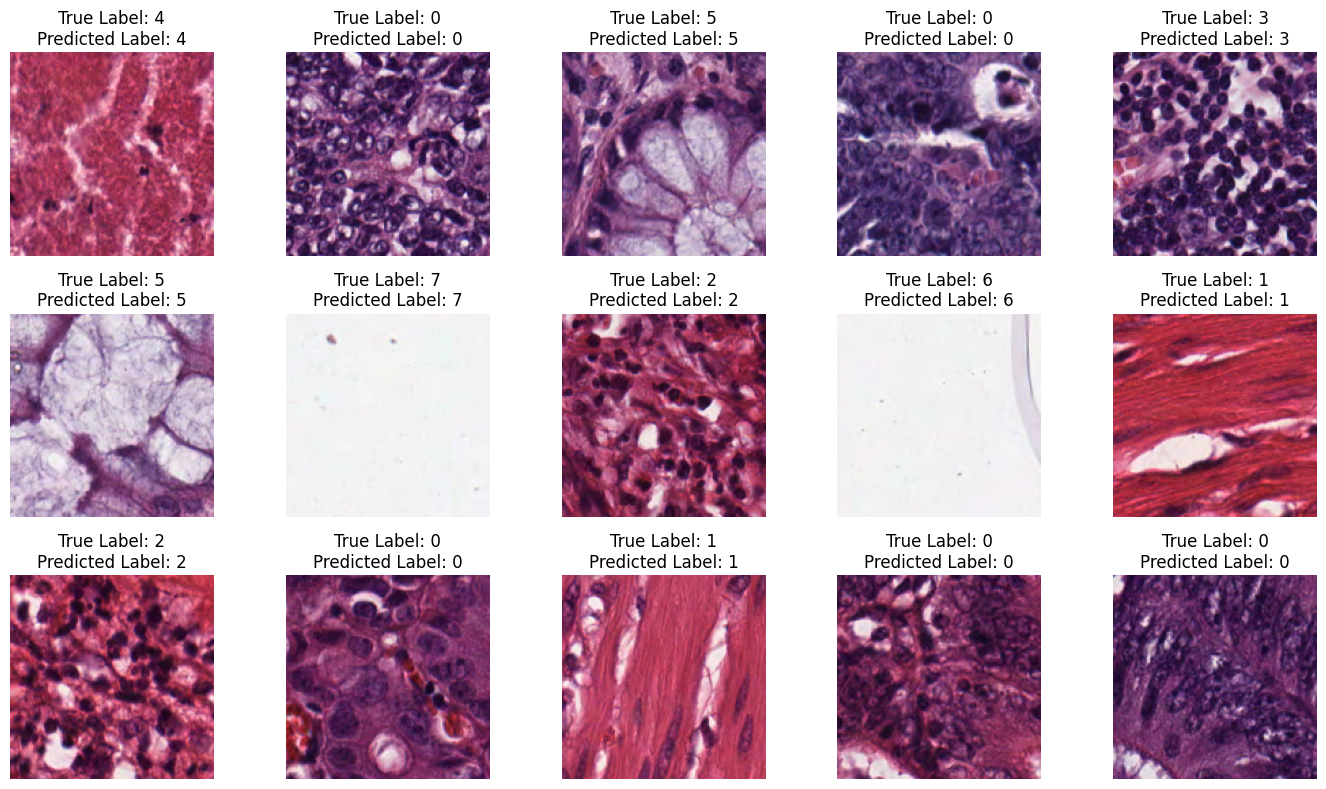

In [71]:
# Get predictions for test examples
predictions = model_data_aug.predict(X_test)

# Choose 15 random test examples
random_indices = np.random.choice(range(len(X_test)), size=15, replace=False)

# Plot the images and their predicted labels
plt.figure(figsize=(14, 8))
for i, index in enumerate(random_indices):
    image = X_test[index]
    label = y_test[index]
    predicted_label = np.argmax(predictions[index])

    plt.subplot(3, 5, i + 1)
    plt.imshow(image)
    plt.title(f"True Label: {label}\nPredicted Label: {predicted_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()

Links

https://www.tensorflow.org/datasets/catalog/colorectal_histology?hl=he

https://www.kaggle.com/datasets/kmader/colorectal-histology-mnist

https://arjuninventor.medium.com/solving-with-ai-colorectal-histology-tissue-classification-ca354da3beae
